In [69]:
class argsclass():
    pass
args = argsclass()

args.experiment_name='ResNet_batch_16_samples_5_in_5_out_1_lr_0.001' 
args.normalizer_type='normal'
args.test_starting_point=15
args.show_plots=True
args.debug=True
args.num_workers = 4
args.batch_size = 16

In [70]:
import math
import seaborn as sns
from utils.plotting import imshow
from utils.experiment_evaluator import get_test_predictions_pairs, save_sequence_plots
from utils.helper_functions import normalize_image

def show_prediction_plot(title, predicted, target, normalize):
    # -1 means print last frame
    # predicted = predicted[image_to_plot, -1:, :, :].cpu()
    # target = target[image_to_plot, -1:, :, :].cpu()
    fig = plt.figure(figsize=(6, 6))
    sns.set(style="white")  # darkgrid, whitegrid, dark, white, and ticks
    sns.set_context("talk")
    pred = fig.add_subplot(1, 2, 1)
    imshow(predicted, title="Predicted", smoothen=True, obj=pred, normalize=normalize)
    tar = fig.add_subplot(1, 2, 2)
    imshow(target, title="Target", obj=tar, normalize=normalize)
    fig.suptitle(title)
    plt.show()
    plt.close()

def prepro(image, normalizer):
    image = normalize_image(image, normalizer)
    image = np.clip(image, 0, 1)
    return image

In [71]:
import sys
sys.path.append('..')
sys.path.append('../..')
import logging
import torch
import matplotlib.pyplot as plt
import numpy as np
from utils.arg_extract import get_args
from utils.experiment_evaluator import Evaluator, get_sample_predictions
from utils.experiment import Experiment

plt.ioff()
logging.basicConfig(format='%(message)s', level=logging.INFO)

# args = get_args()

experiment = Experiment(args)
experiment.load_from_disk(test=True)
evaluator = Evaluator(args.test_starting_point, experiment.normalizer,)

model = experiment.model
dataloader = experiment.dataloaders['test']
device = experiment.device
normalizer = experiment.normalizer
debug = args.debug

Experiment ResNet_batch_16_samples_5_in_5_out_1_lr_0.001
Creating directories
use CPU
Loading datasets
Loading model /Users/stathis/Code/thesis/wave_propagation/experiments_results/ResNet_batch_16_samples_5_in_5_out_1_lr_0.001/models/model_best.pt


In [72]:
batch_images = next(iter(dataloader))

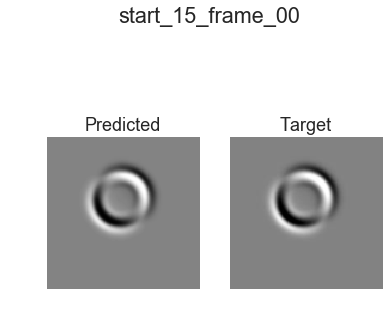

0.99894 0.00551


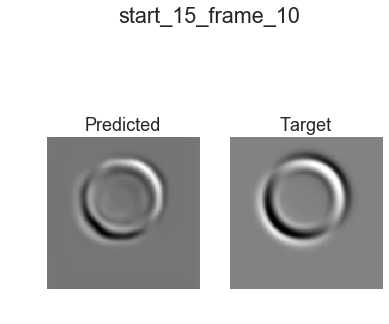

0.88920 0.08230


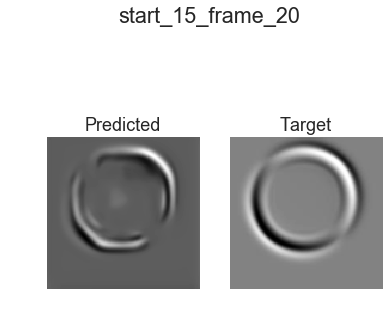

0.72645 0.13327


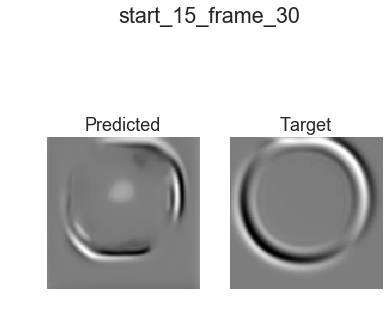

0.72574 0.13631


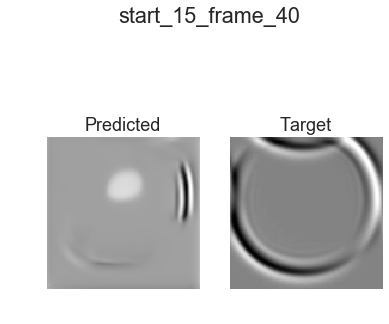

0.75266 0.13938


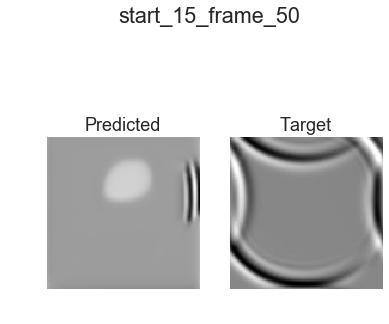

0.73234 0.15083


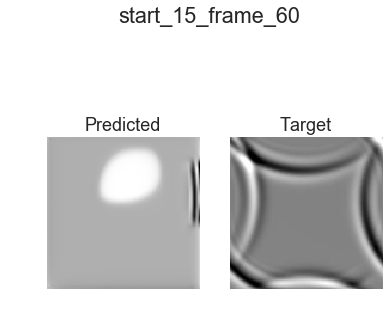

0.69691 0.14133


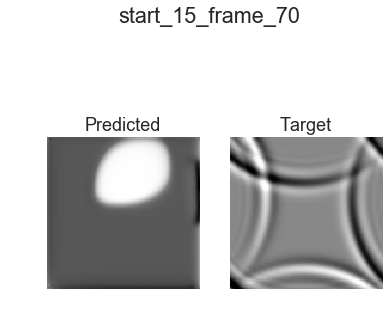

0.63036 0.15326


In [73]:
from skimage import measure
num_input_frames = model.get_num_input_frames()
num_output_frames = model.get_num_output_frames()
num_total_frames = batch_images.size(1)
batch_images = batch_images.to(device)

starting_point = 15
num_total_output_frames = 80
output_frames, target_frames = get_test_predictions_pairs(model, batch_images, starting_point, num_total_output_frames)

num_real_total_frames = output_frames.size(1)
for frame_index in range(0, num_real_total_frames, 10):
    title = 'start_%02d_frame_%02d' % (starting_point, frame_index)
    output = prepro(output_frames[0, frame_index, :, :].cpu().numpy(), experiment.normalizer)
    target = prepro(target_frames[0, frame_index, :, :].cpu().numpy(), experiment.normalizer)
    show_prediction_plot(title, output, target, normalizer)
    ssim = measure.compare_ssim(output, target, multichannel=False, gaussian_weights=True)
    rmse = np.sqrt(measure.compare_mse(output, target))
    print('%.5f %.5f' % (ssim, rmse))

In [75]:
batch_images.size()

torch.Size([16, 100, 128, 128])

tensor(-0.0235)


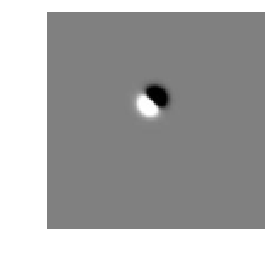

tensor(0.0081)


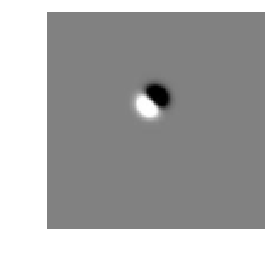

tensor(0.0413)


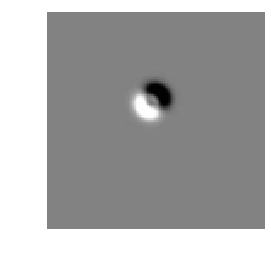

tensor(0.0405)


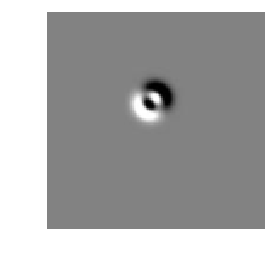

tensor(0.0402)


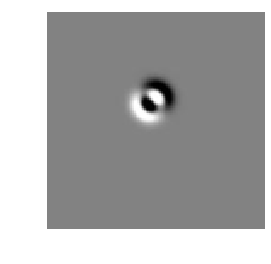

tensor(0.0090)


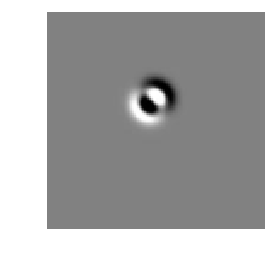

tensor(0.0074)


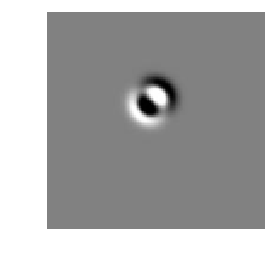

tensor(0.0084)


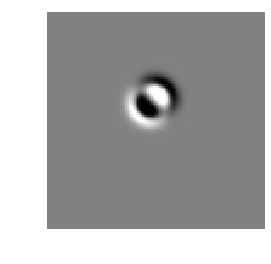

tensor(0.0067)


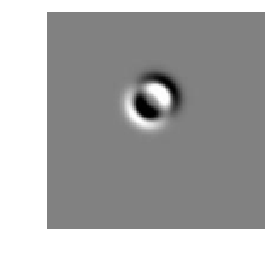

tensor(0.0385)


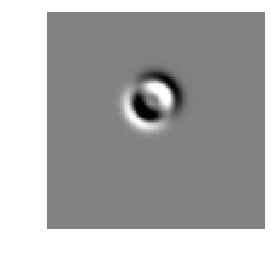

tensor(0.0069)


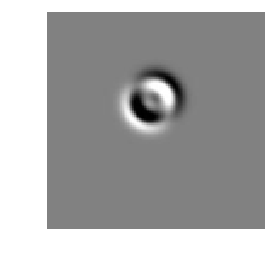

tensor(0.0065)


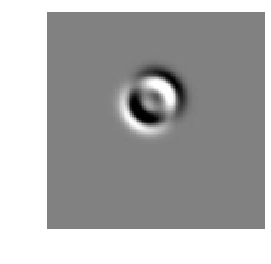

tensor(0.0067)


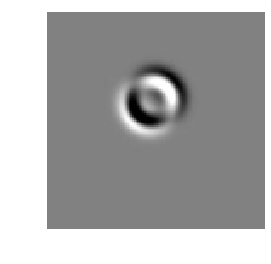

tensor(0.0079)


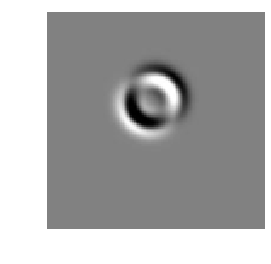

tensor(0.0381)


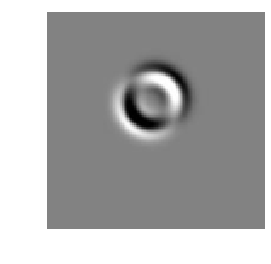

tensor(0.0402)


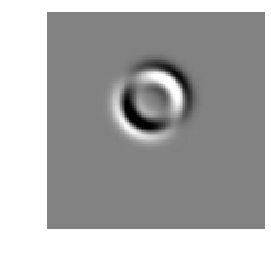

tensor(0.0418)


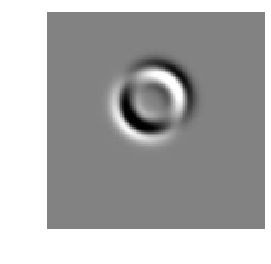

tensor(0.0378)


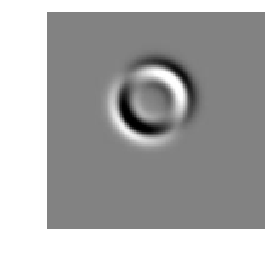

tensor(0.0377)


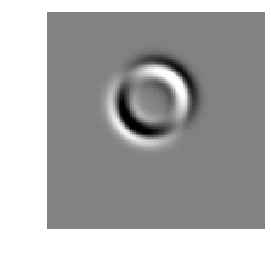

tensor(0.0372)


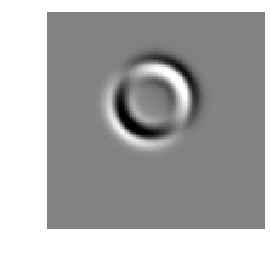

tensor(0.0379)


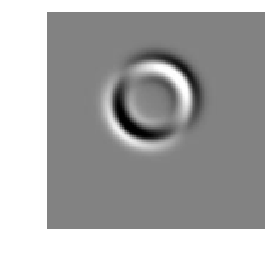

tensor(0.0365)


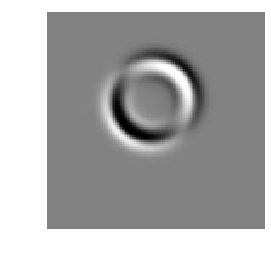

tensor(0.0074)


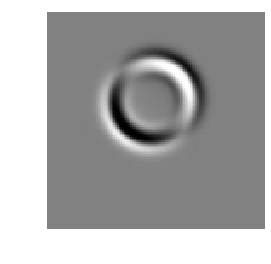

tensor(0.0370)


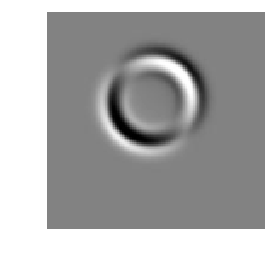

tensor(0.0348)


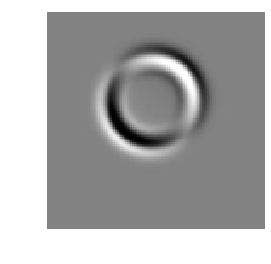

tensor(0.0328)


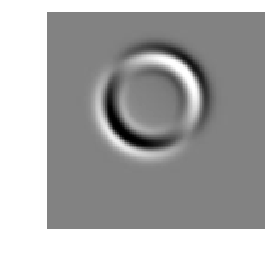

tensor(0.0351)


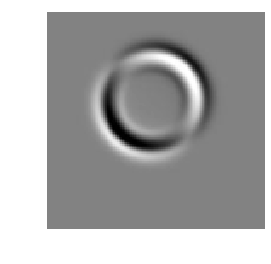

tensor(0.0351)


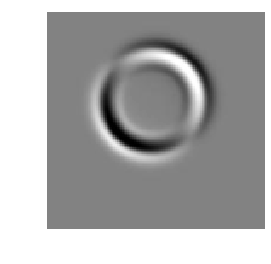

tensor(0.0335)


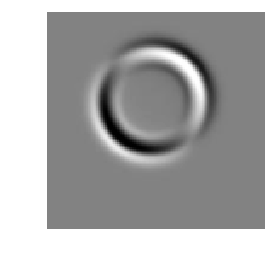

tensor(0.0340)


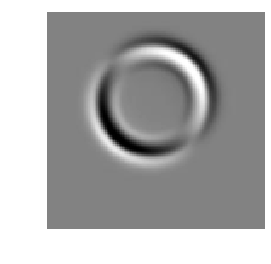

tensor(0.0295)


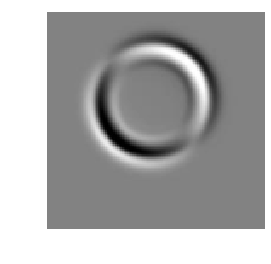

tensor(0.0341)


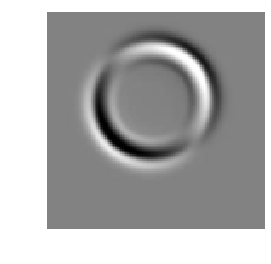

tensor(0.0400)


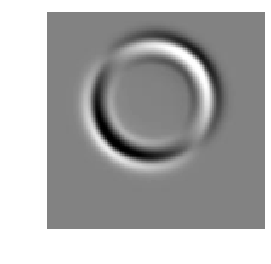

tensor(0.0329)


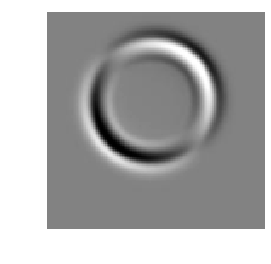

tensor(0.0349)


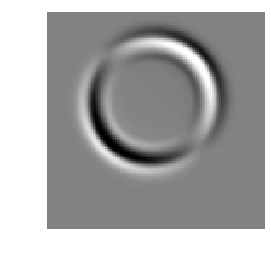

tensor(0.0319)


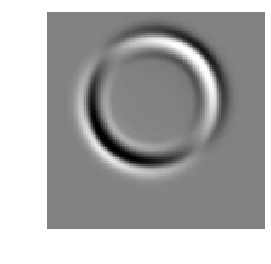

tensor(0.0304)


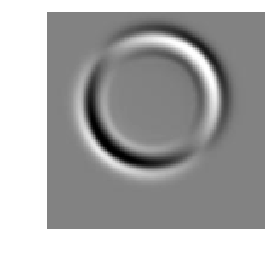

tensor(0.0329)


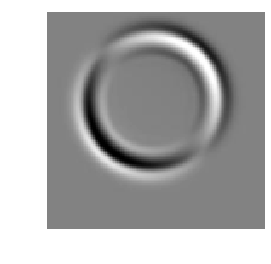

tensor(0.0341)


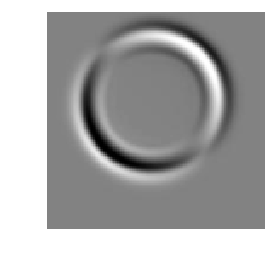

tensor(0.0292)


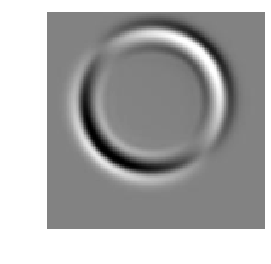

tensor(0.0318)


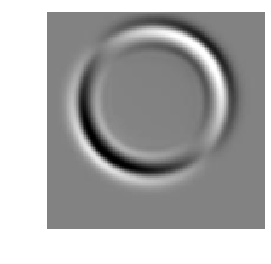

tensor(0.0387)


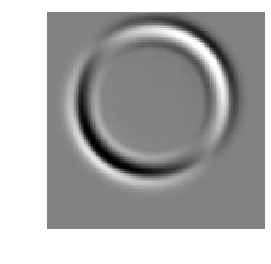

tensor(0.0369)


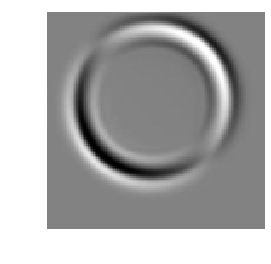

tensor(0.0429)


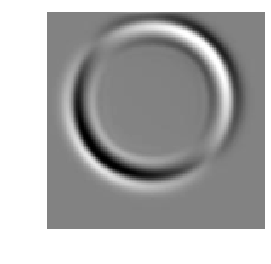

tensor(0.0469)


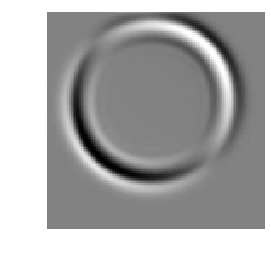

tensor(0.0488)


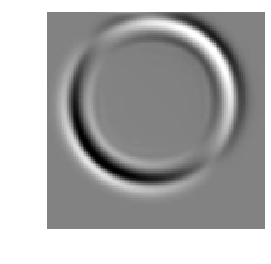

tensor(0.0408)


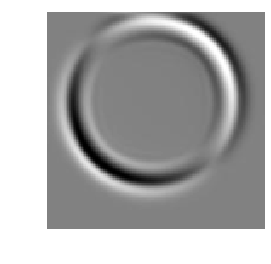

tensor(-0.0096)


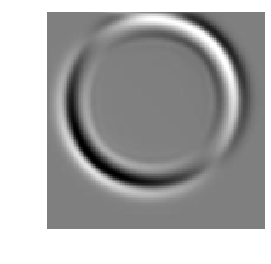

tensor(-0.0824)


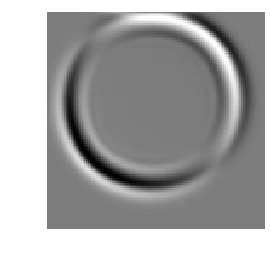

tensor(-0.1287)


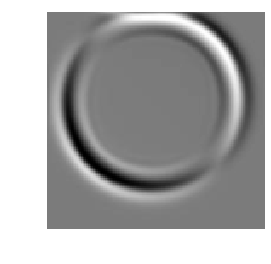

tensor(-0.0724)


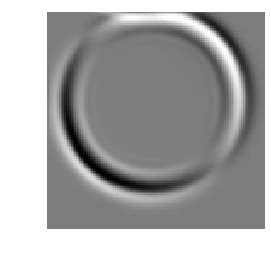

tensor(-0.0462)


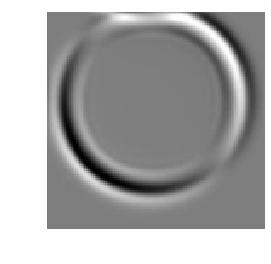

tensor(-0.0388)


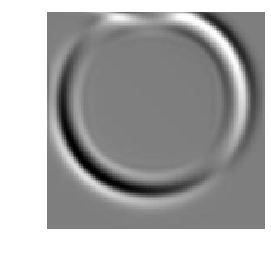

tensor(-0.0419)


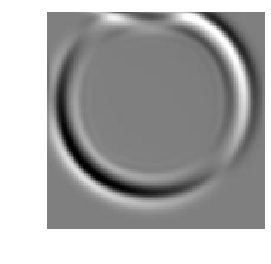

tensor(-0.0420)


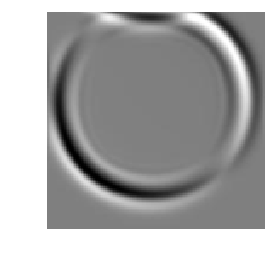

tensor(-0.0445)


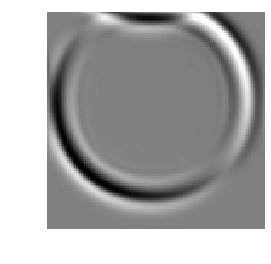

tensor(0.0165)


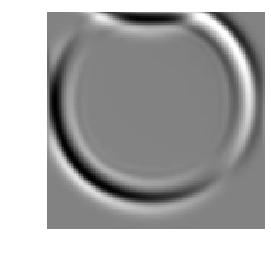

tensor(0.0981)


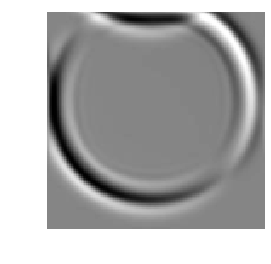

tensor(0.1453)


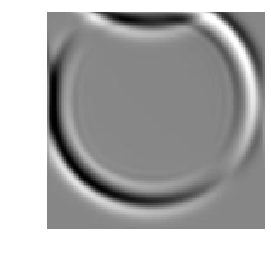

tensor(0.1054)


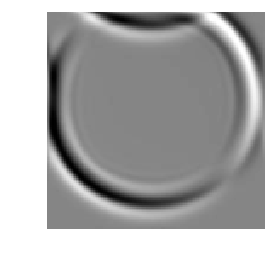

tensor(0.0731)


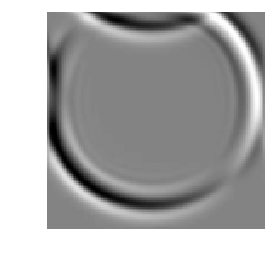

tensor(-0.0115)


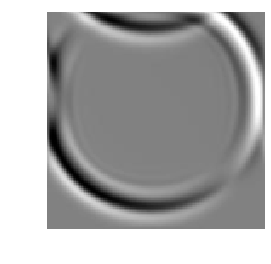

tensor(-0.0425)


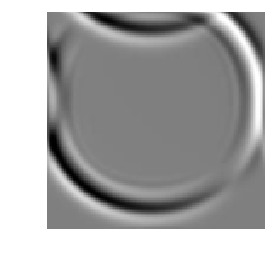

tensor(0.0131)


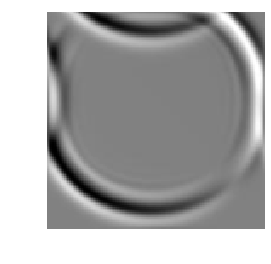

tensor(0.0205)


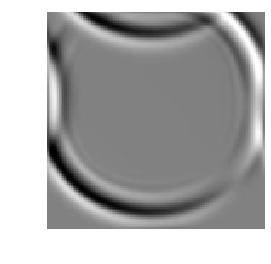

tensor(0.0281)


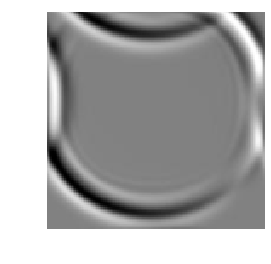

tensor(0.0329)


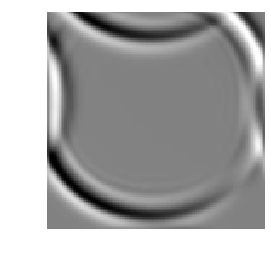

tensor(0.0286)


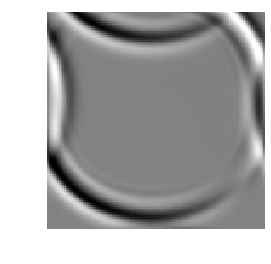

tensor(0.0198)


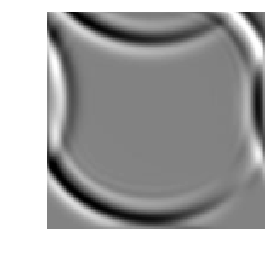

tensor(0.0513)


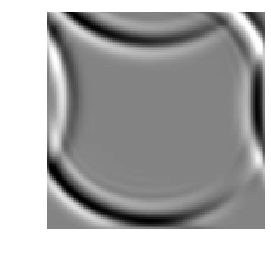

tensor(0.1369)


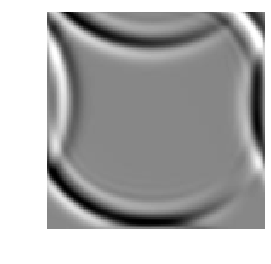

tensor(0.1515)


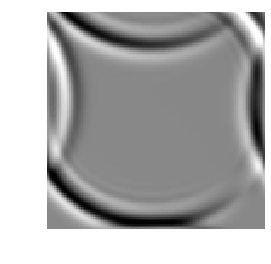

tensor(0.1668)


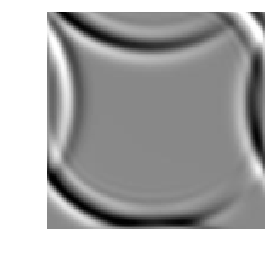

tensor(0.1616)


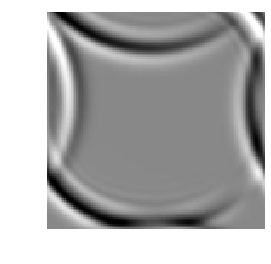

tensor(0.1138)


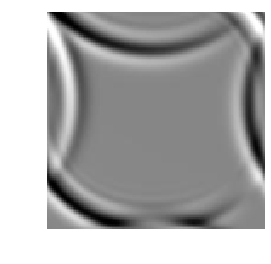

tensor(0.0533)


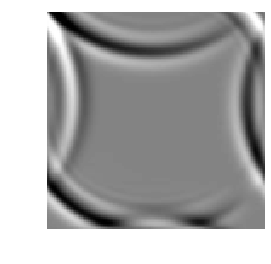

tensor(-0.0295)


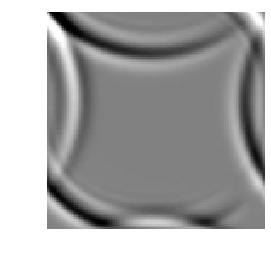

tensor(-0.1241)


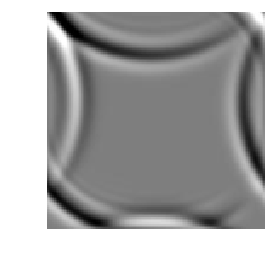

tensor(-0.2057)


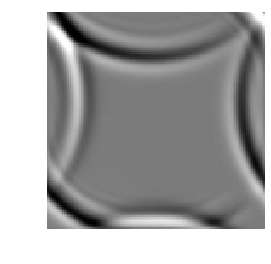

tensor(-0.1035)


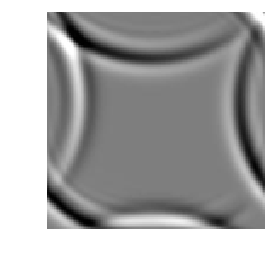

tensor(0.0486)


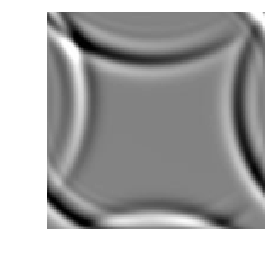

tensor(0.1976)


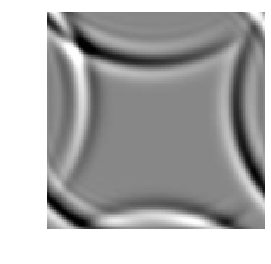

tensor(0.2020)


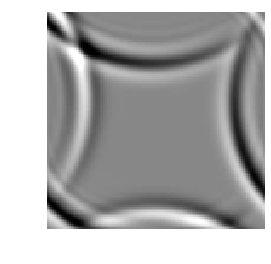

tensor(0.1603)


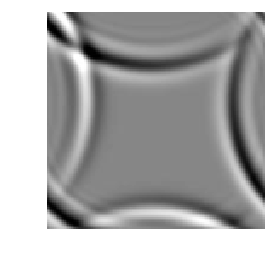

tensor(0.1037)


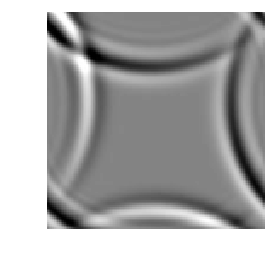

tensor(0.1404)


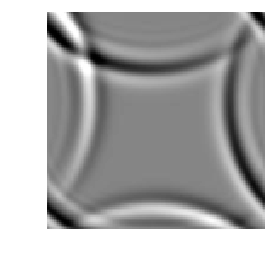

tensor(0.2421)


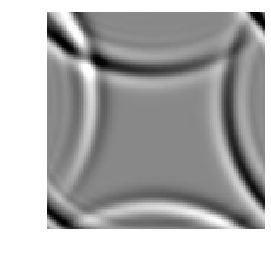

tensor(0.2556)


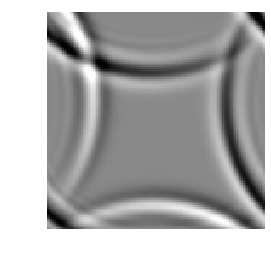

tensor(0.1963)


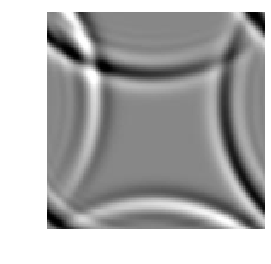

tensor(0.2046)


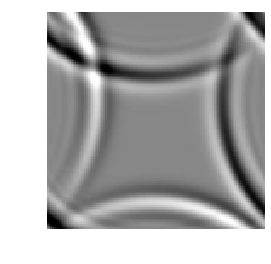

tensor(0.2248)


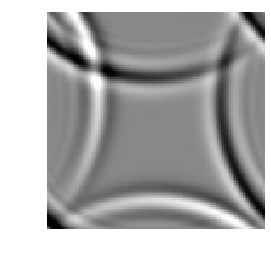

tensor(0.2353)


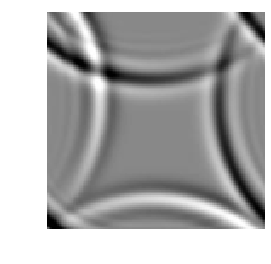

tensor(0.2001)


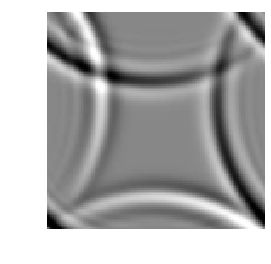

tensor(0.1043)


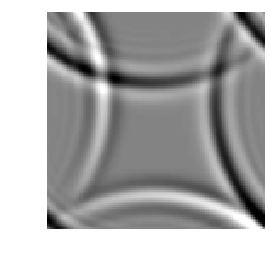

tensor(0.0842)


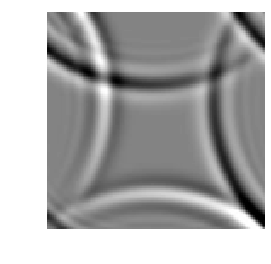

tensor(0.0457)


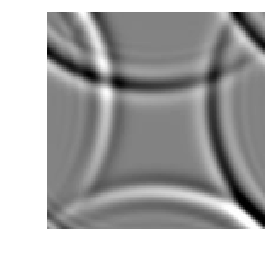

tensor(0.0249)


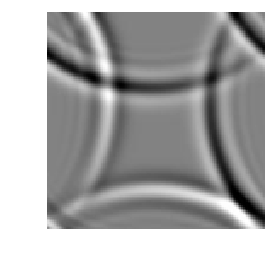

tensor(0.0545)


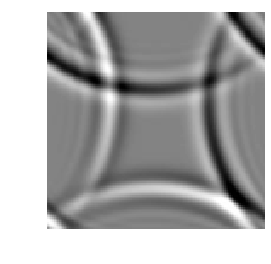

tensor(-0.0377)


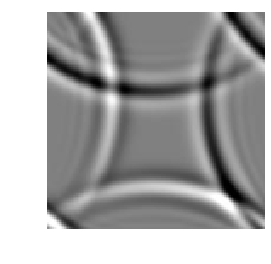

tensor(-0.0866)


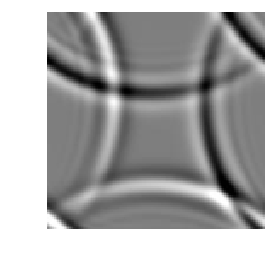

In [87]:
for i in range(100):
    img = batch_images[0, i, :, :]
    imshow(img)
    print(img.mean())
    plt.show()